<a href="https://colab.research.google.com/github/IsidoraJevremovic/osnovi-astronomije/blob/main/12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np

# Pretpostavimo da je naziv vaše datoteke 'sun.txt'
filename = 'sun.txt'

# Učitavanje podataka
data = np.loadtxt(filename)

# Ispis podataka
print(data)


[[5.00000000e-10 5.16949335e+07]
 [1.50000000e-09 9.61708113e+08]
 [2.50000000e-09 6.88641294e+08]
 ...
 [2.39042000e-06 2.62862721e+12]
 [2.40140000e-06 2.58820216e+12]
 [2.41234000e-06 2.54157389e+12]]


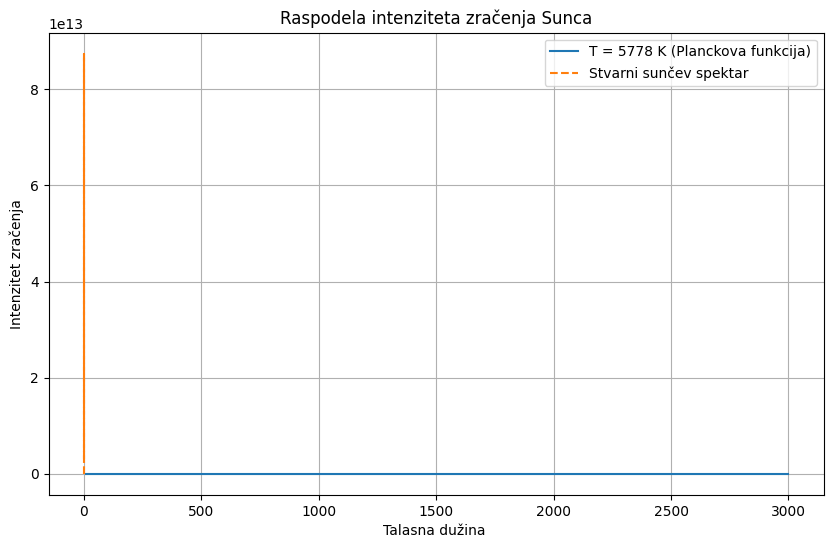

Talasna dužina maksimalnog intenziteta Sunca (teorijski): 500.85 nm
Boja koja odgovara talasnoj dužini maksimalnog intenziteta (teorijski): zelena


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import h, c, k_B
from astropy import units as u

def planck_function(lambda_m, T):

    lambda_m = lambda_m * u.m
    T = T * u.K

    intensity = (2 * h * c**2 / lambda_m**5) / (np.exp((h * c) / (lambda_m * k_B * T)) - 1)

    return intensity.to(u.W / (u.m**2 * u.nm))

T_sun = 5778

wavelengths_nm = np.linspace(10, 3000, 1000)
wavelengths_m = wavelengths_nm * 1e-9
intensities = planck_function(wavelengths_m, T_sun)

data = np.loadtxt('sun.txt')
wavelengths_sun = data[:, 0]
intensities_sun = data[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(wavelengths_nm, intensities, label=f'T = {T_sun} K (Planckova funkcija)')
plt.plot(wavelengths_sun, intensities_sun, label='Stvarni sunčev spektar', linestyle='--')
plt.xlabel('Talasna dužina ')
plt.ylabel('Intenzitet zračenja')
plt.title('Raspodela intenziteta zračenja Sunca')
plt.legend()
plt.grid(True)
plt.show()


max_intensity_index = np.argmax(intensities)
max_wavelength_nm = wavelengths_nm[max_intensity_index]

print(f'Talasna dužina maksimalnog intenziteta Sunca (teorijski): {max_wavelength_nm:.2f} nm')


if 380 <= max_wavelength_nm <= 450:
    color = "ljubičasta"
elif 450 < max_wavelength_nm <= 495:
    color = "plava"
elif 495 < max_wavelength_nm <= 570:
    color = "zelena"
elif 570 < max_wavelength_nm <= 590:
    color = "žuta"
elif 590 < max_wavelength_nm <= 620:
    color = "narandžasta"
elif 620 < max_wavelength_nm <= 750:
    color = "crvena"
else:
    color = "izvan vidljivog spektra"

print(f'Boja koja odgovara talasnoj dužini maksimalnog intenziteta (teorijski): {color}')
